# DSM y Translation Matrix

In [48]:
%matplotlib inline
from numpy.linalg import *
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

def vocab():
    dicc = defaultdict()
    dicc.default_factory = lambda: len(dicc)
    return dicc

def BoW(corpus,vocab):
    for w in corpus:
        yield[vocab[w_i] for w_i in w.split()]
        
def DSM (sentences):
    words = vocab()
    BagOfWords = list(BoW(sentences,words))

    A = np.zeros((len(words),len(words)))
    for w1 in words:
        for w2 in words:
            cooc = 0
            for context in BagOfWords:
                if words[w1] in context and words[w2] in context and w1 != w2:
                    cooc += 1
            A[words[w1],words[w2]] = cooc

    return words, A
  
espanol = ['el gato come el pan', 'el gato duerme','el gato es bonito']
japo = ['neko wa pan o tabemasu','neko wa nemasu','neko wa kawaii desu']
es, ES = DSM(espanol)
jp, JP = DSM(japo)

print ES
print JP

[[ 0.  3.  1.  1.  1.  1.  1.]
 [ 3.  0.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  1.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.  1.]
 [ 1.  1.  0.  0.  0.  1.  0.]]
[[ 0.  3.  1.  1.  1.  1.  1.  1.]
 [ 3.  0.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  1.  1.  0.  0.  0.]
 [ 1.  1.  1.  0.  1.  0.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.  0.  1.]
 [ 1.  1.  0.  0.  0.  0.  1.  0.]]


In [55]:
def low(A,k=2):
    Q,S,D = svd(A)
    Q = Q[:,:k]
    S = np.diag(S)[:k,:k]
    B = np.zeros((len(A),k))
    for i,w in enumerate(A):
        B[i] = np.dot(np.linalg.inv(S),np.dot(Q.T,w))
    return B

#JP = low(JP,len(ES))
#print JP

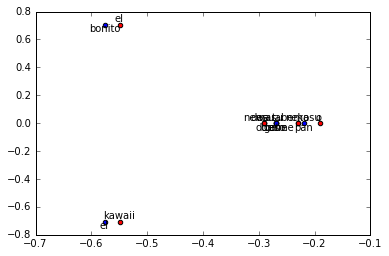

In [77]:
def plot_words(Z,ids,names='bottom',color='blue'):
    r=0
    plt.scatter(Z[:,0],Z[:,1], marker='o', c=color)
    for label,x,y in zip(ids, Z[:,0], Z[:,1]):
        plt.annotate(label.decode('utf8'), xy=(x,y), xytext=(-1,1), textcoords='offset points', ha='center', va=names)
        r+=1

plot_words(low(ES,2),es.keys(),'top')
plot_words(low(JP,2),jp.keys(),color='red')
plt.show()

In [89]:
seed = [('el','wa'),('come','tabemasu'),('duerme','nemasu'),('bonito','kawaii')]

V1 = np.zeros((len(seed),len(ES)))
V2 = np.zeros((len(seed),len(JP)))
for i,(w1,w2) in enumerate(seed):
    V1[i] = ES[es[w1]]
    V2[i] = JP[jp[w2]]
    
W = lstsq(V1,V2,-1)[0]

JP2 = np.zeros((len(JP),len(ES)))
for i,w in enumerate(JP):
    JP2[i] = np.dot(W, w)
    
ES2 = np.zeros((len(ES),len(JP)))
for i,w in enumerate(ES):
    ES2[i] = np.dot(W.T, w)
    
print JP2.shape, ES2.shape

(8, 7) (7, 8)


In [114]:
def cos(x,y):
    return np.dot(x,y)/ (norm(x)*norm(y))

target = 'neko'
for word in es:
    try:
        esp2 = cos(JP[jp[target]],ES2[es[word]])
        japo2 = cos(JP2[jp[target]],ES[es[word]])
        print word, 2*(esp2*japo2)/(esp2+japo2)
    except:
        pass

el 0.449215438978
bonito 0.659501152723
duerme 0.605790490855
gato 0.692413371452
pan 0.505459370343
come 0.759408499256
es 0.505459370343
